# Lambda School Data Science - Getting Started with Python

Following are exercises you should complete after watching the first intro lecture. Workflow:

1. Sign in to a Google account
2. Copy the notebook (`File` -> `Save a copy in Drive`)
3. Complete the exercises! This means fill out the code cells, and run them (shift-enter or click the play button that appears when you're in one of them)
4. Take a look at your work, and write comments/add text cells as appropriate to explain
5. Make the notebook URL viewable and submit with the standup form

## Exercise 1 - A bit of Math

For these "word" problems, use Python to clearly solve them. Your code will "show your work" - use good variable names! To show your answers you should write a `print()` statement at the end.

As you work, follow the **20 minute rule** - that means if you're stuck on something for 20 minutes, you should ask a question!

### a) It's a gas

A taxi driver is calculating their profit over two weeks by adding up the fares they charge and subtracting the cost of gas. The price of gas changes over time - it was `$3.52`/gallon the first week and `$3.57`/gallon this second week. Their car gets 20 miles per gallon.

For the first week the driver had a total of 23 passengers with average `$29` fare each, and drove a total of 160 miles. For the second week they had 17 passengers with average `$30` fare each, and drove a total of 220 miles. Assume that for both weeks they purchase all the gas needed during that week (i.e. they refuel every week to maintain a constant level of gas in the tank).

Based on the above, answer the following questions:

- What is their total profit over both weeks?
- During which week was their average (mean) profit per passenger higher?


In [0]:
# create a function with the following arguments:
# mpg = miles per gallon
# gas_price = weekly gas price per gallon
# miles_drove = how many miles the driver drove weekly
# passengers = how many passengers took the taxi
# avgfare = average fare of each passenger
def profit(mpg, gas_price, miles_drove, passengers, avgfare):
  weekly_gas = (miles_drove / mpg) * gas_price
  total_fares = passengers * avgfare - weekly_gas
  return total_fares

# calculating total profit for each week
# week 1:
# mpg = 20
# gas_price = 3.52
# miles_drove = 160
# passengers = 23
# avgfare = 29
week_1_total = profit(20, 3.52, 160, 23, 29)

# week 2:
# mpg = 20
# gas_price = 3.57
# miles_drove = 220
# passengers = 17
# avg_fare = 30
week_2_total = profit(20, 3.57, 220, 17, 30)

# rounding to two decimal places for amount in dollars and cents
total_profit = round(week_1_total + week_2_total, 2)
print("The driver's total profit for two weeks is ${}.".format(total_profit))

# calculating average profit per passenger round to two decimal places
per_passenger1 = round(week_1_total / 23, 2)
per_passenger2 = round(week_2_total / 17, 2)
print("The profit per passenger for the first week is ${}.".format(per_passenger1))
print("The profit per passenger for the second week is ${}.".format(per_passenger2))
print("The first week had a higher average profit per passenger.")

The driver's total profit for two weeks is $1109.57.
The profit per passenger for the first week is $27.78.
The profit per passenger for the second week is $27.69.
The first week had a higher average profit per passenger.


### b) Mo' money...

A cash drawer contains 160 bills, all 10s and 50s. The total value of the 10s and 50s is $1,760.

How many of each type of bill are in the drawer? You can figure this out by trial and error (or by doing algebra with pencil and paper), but try to use loops and conditionals to check a plausible possibilities and stop when you find the correct one.

In [0]:
# first loop through range 0 to 160 and store with variable ten_bills
for ten_bills in range(0, 160):
  # second loop through range 0 to 160 and store with fifties_bills
  for fifties_bills in range(0, 160):
    
    # if adding bills together doesn't amount to 160 for this loop:
    if ten_bills + fifties_bills != 160:
      # loop again
      continue
    
    #  if amount of fifty bills and ten bills don't amount to $1,760
    if fifties_bills * 50 + ten_bills * 10 != 1760:
      # loop again
      continue
    
    # print statement for amount of ten dollar bills and fifty dollar bills
    print(ten_bills, "ten dollar bills and", fifties_bills, "fifty dollar bills add up to $1760 with", ten_bills + fifties_bills, "bills.")
    # break out of second loop and go back to first loop
    break

156 ten dollar bills and 4 fifty dollar bills add up to $1760 with 160 bills.


## Exercise 2 - Drawing a plot

Use NumPy and Matplotlib to draw a scatterplot of uniform random `(x, y)` values all drawn from the `[0, 1]` interval. Helpful documentation:

*   https://matplotlib.org/tutorials/index.html
*   https://docs.scipy.org/doc/numpy/user/quickstart.html

Stretch goal - draw more plots! You can refer to the [Matplotlib gallery](https://matplotlib.org/gallery.html) for inspiration, but don't just reproduce something - try to apply it to your own data.

How to get data? There's *many* ways, but a good place to get started is with [sklearn.datasets](http://scikit-learn.org/stable/datasets/index.html):

```
from sklearn import datasets
dir(datasets)
```

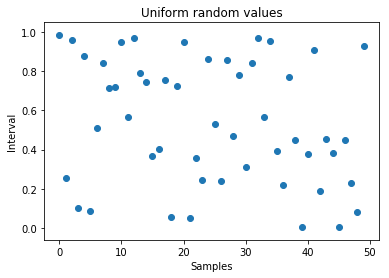

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


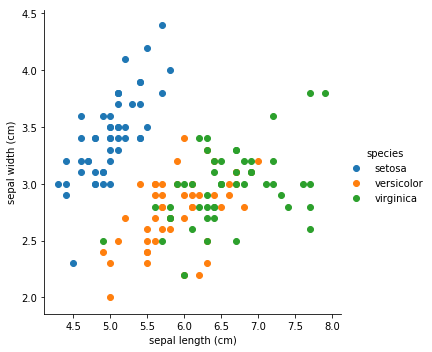

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random

N = 50  # number of samples
x = range(N) # x = range(0, 50)

# uniform generates random numbers in the interval [x, y)
# in this case would be [0, 1)
y = [random.uniform(0,1) for i in x]
plt.scatter(x, y)
plt.title('Uniform random values')
plt.xlabel('Samples')
plt.ylabel('Interval')
plt.show()

# Creating a scatter plot for load_iris dataset
# using seaborn
# credit to https://shichaoji.com/2017/02/16/famous-iris-dataset-visualization/
import seaborn as sns
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map(
    {0:iris.target_names[0],
     1:iris.target_names[1],
     2:iris.target_names[2]}
)

sns.FacetGrid(df, hue="species", size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

## Exercise 3 - Writing a function
Write a function that, given a list of numbers, calculates the mean, median, and mode of those numbers. Return a dictionary with properties for the mean, median and mode. 

For example:

```
mmm_dict = meanMedianMode([1, 2, 6, 7, 8, 9, 3, 4, 5, 10, 10])
print(mmm_dict)
> {'mean': 5.909090909090909, 'median': 6, 'mode': 10}
```

There are Python standard libraries that make calculating these numbers very easy, but first try your hand at implementing it using the `reduce()` function:

In [0]:
from functools import reduce
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



In [0]:
from functools import reduce

def meanMedianMode(numbers):
    # empty dictionary
    dct = {}
    
    # finding the mean by summing list using reduce function
    # then dividing by length of list
    mean = reduce(lambda x, y: x + y, numbers) / len(numbers)
    
    # finding the number in list with most occurrence
    def mode(n):
      # find the number with most occurrences of list
      return max(set(n), key=n.count)
    
    # finding median of list
    def median(n):
      # sort the list ascending and find length of list
      nsort = sorted(n)
      length = len(nsort)
      # find middle point
      mid = length//2
      # if remainder is 0, return middle index
      if length % 2:
        return nsort[mid]
      # otherwise, take both midpoints and divide them by 2
      else:
        odd_med = (nsort[mid] + nsort[mid-1]) / 2
        return odd_med
    
    # adding to dictionary
    dct['mean'] = mean
    dct['median'] = median(numbers)
    dct['mode'] = mode(numbers)
    
    return dct
  
mmm_dict = meanMedianMode([1, 2, 6, 7, 8, 9, 3, 4, 5, 10, 10])
print(mmm_dict)

{'mean': 5.909090909090909, 'median': 6, 'mode': 10}


In [0]:
def meanMedianMode(numbers):
  d = {}
  d['mean'] = reduce(lambda x, y: x+y, numbers) / len(numbers)
  d['median'] = median(numbers)
  d['mode'] = mode(numbers)
  return d

def median(numbers):
  median = sorted(numbers) [len(numbers) // 2]
  return median

def mode(numbers):
  mode = max(numbers, key = numbers.count)
  return mode

mmm_dict = meanMedianMode([1, 2, 6, 7, 8, 9, 3, 4, 5, 10, 10])

print(mmm_dict)

{'mean': 5.909090909090909, 'median': 6, 'mode': 10}


# New Section